In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [2]:
df = pd.read_excel("Time_Series_Data_Example.xlsx")

In [3]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index("Date")

In [4]:
train, test = df[:-364], df[-364:]

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [6]:
look_back = 10
n_features = 1

generator = TimeseriesGenerator(train, train,
                                length = look_back,
                                sampling_rate = 1,
                                stride = 1,
                                batch_size = 3)

In [7]:
model = Sequential()
model.add(LSTM(units = 200, return_sequences = True, input_shape=(look_back, n_features)))
model.add(Dropout(0.15))


#Add second LSTM layer 
model.add(LSTM(units = 200, return_sequences = True))
model.add(Dropout(0.2))

#Add third LSTM layer 
model.add(LSTM(units = 150, return_sequences = True))
model.add(Dropout(0.2))

#Add fourth LSTM layer 
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

#Add fifth LSTM layer 
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

#Add sixth LSTM layer 
model.add(LSTM(units = 25, return_sequences = True, activation='relu'))
model.add(Dropout(0.2))


#flatten
model.add(Flatten())


model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

W1231 15:30:09.995106 20212 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1231 15:30:10.008633 20212 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1231 15:30:10.011678 20212 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1231 15:30:10.242593 20212 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please us

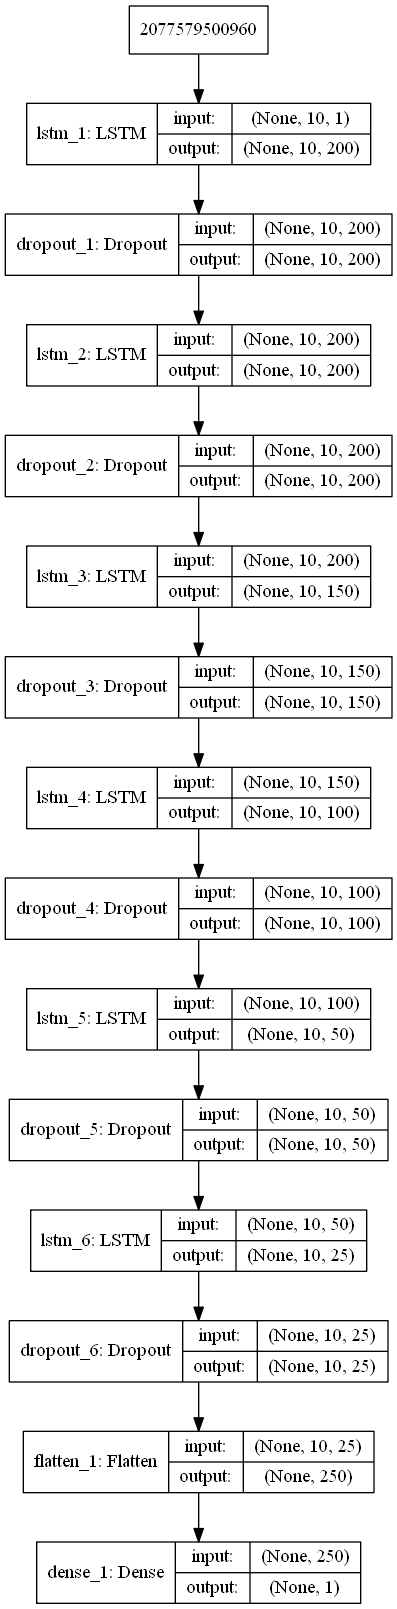

In [8]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png')

In [9]:
model.fit_generator(generator, epochs=100)

W1231 15:30:11.978267 20212 deprecation.py:323] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1231 15:30:15.602864 20212 deprecation_wrapper.py:119] From C:\Users\Admin\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
119/119 [==============================] - 17s 146ms/step - loss: 0.1015
Epoch 2/100
119/119 [==============================] - 13s 105ms/step - loss: 0.0748
Epoch 3/100
119/119 [==============================] - 12s 105ms/step - loss: 0.0701
Epoch 4/100
119/119 [==============================] - 12s 105ms/step - loss: 0.0708
Epoch 5/100
119/119 [==============================] - 12s 105ms/step - loss: 0.0422
Epoch 6/100
119/119 [==============================] - 12s 104ms/step - loss: 0.0285
Epoch 7/100
119/119 [==============================] - 12s 104ms/step - loss: 0.0102
Epoch 8/100
119/119 [==============================] - 13s 106ms/step - loss: 0.0113
Epoch 9/100
119/119 [==============================] - 12s 105ms/step - loss: 0.0220
Epoch 10/100
119/119 [==============================] - 12s 104ms/step - loss: 0.0263
Epoch 11/100
119/119 [==============================] - 12s 104ms/step - loss: 0.0057
Epoch 12/100
119/119 [==============================] - 12s 105

119/119 [==============================] - 13s 109ms/step - loss: 0.0129
Epoch 97/100
119/119 [==============================] - 13s 108ms/step - loss: 0.0117
Epoch 98/100
119/119 [==============================] - 13s 108ms/step - loss: 0.0111
Epoch 99/100
119/119 [==============================] - 13s 108ms/step - loss: 0.0099
Epoch 100/100
119/119 [==============================] - 13s 109ms/step - loss: 0.0059


In [10]:
model.save('template_model.h')

In [11]:
from keras.models import load_model
model = load_model('template_model.h')

In [12]:
model.evaluate_generator(generator)

0.001205260840864601

In [13]:
trainPredict = model.predict_generator(generator)
trainPredict.shape

(356, 1)

In [14]:
trainPredict = scaler.inverse_transform(trainPredict)

In [15]:
train = scaler.inverse_transform(train)
train.shape

(366, 1)

In [16]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(train)

trainPredictPlot[:, :] = np.nan

trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict




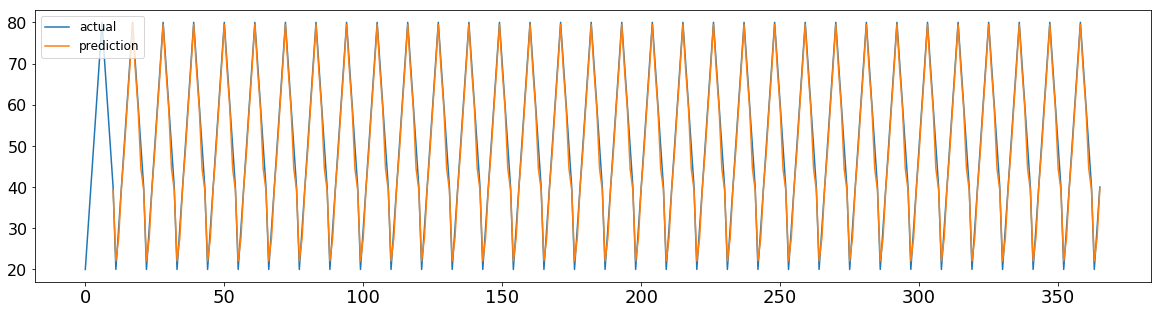

In [17]:
plt.figure(figsize=(20, 5))
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.plot(train, label="actual")
plt.plot(trainPredictPlot, label="prediction")
plt.legend(loc='best', fontsize='large')
plt.show()

In [22]:
train = df

In [23]:
scaler.fit(train)
train = scaler.transform(train)

In [24]:
look_back = 10
n_features = 1

generator = TimeseriesGenerator(train, train,
                                length = look_back,
                                sampling_rate = 1,
                                stride = 1,
                                batch_size = 3)

In [25]:
pred_list = []

batch = train[-look_back:].reshape((1, look_back, n_features))

for i in range(look_back):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [26]:
from pandas.tseries.offsets import DateOffset

add_dates = [df.index[-1] + DateOffset(days=x) for x in range(0,11) ]

future_dates = pd.DataFrame(index=add_dates[1:], columns=df.columns)

In [27]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-look_back:].index, columns=['Prediction'])

df_proj = pd.concat([df, df_predict], axis=1)

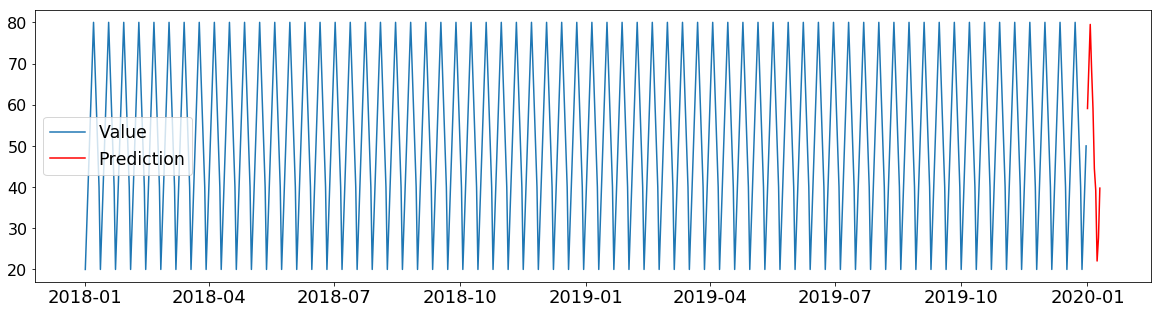

In [28]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Value'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()